In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
%%time
df = pd.read_csv("../data/datas_reste_non_num_a_traiter2.csv",
              sep="\t", encoding="utf-8", low_memory=False)

CPU times: total: 1min 4s
Wall time: 1min 7s


In [3]:
df_init = df

In [4]:
# Sélectionner les colonnes numériques
cols_to_convert_int = list(df.select_dtypes(include=["int64"]).columns)
cols_to_convert_float = list(df.select_dtypes(include=["float64"]).columns)

# Changing format of object and float64 columns
df[cols_to_convert_int] = df[cols_to_convert_int].astype('int32')
df[cols_to_convert_float] = df[cols_to_convert_float].astype('float32')

### Suppression des colonnes qui étaient initialement à +25% null

In [5]:
cols_to_drop = ['product_quantity', 'ecoscore_score', 'serving_size', 'serving_quantity', 'additives_en', 'stores', 'packaging_en', 'brand_owner', 'calcium_100g', 'cholesterol_100g', 'iron_100g', 'trans-fat_100g', 'allergens', 'vitamin-c_100g', 'vitamin-a_100g', 'energy-kj_100g', 'purchase_places', 'manufacturing_places', 'data_quality_errors_tags', 'traces_en', 'emb_codes', 'generic_name', 'origins_en', 'potassium_100g', 'cities_tags', 'first_packaging_code_geo', 'no_nutrition_data', 'owner', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'alcohol_100g', 'vitamin-b1_100g', 'vitamin-pp_100g', 'vitamin-b2_100g', 'packaging_text', 'vitamin-b6_100g', 'magnesium_100g', 'phosphorus_100g', 'vitamin-b12_100g', 'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-estimate_100g', 'carbon-footprint-from-meat-or-fish_100g', 'vitamin-d_100g', 'vitamin-b9_100g', 'zinc_100g', 'abbreviated_product_name', 'folates_100g', 'cocoa_100g', 'pantothenic-acid_100g', 'vitamin-e_100g', 'copper_100g', 'manganese_100g', 'polyols_100g', 'soluble-fiber_100g', 'insoluble-fiber_100g', 'iodine_100g', 'selenium_100g', 'omega-3-fat_100g', 'phylloquinone_100g', 'biotin_100g', 'vitamin-k_100g', 'chloride_100g', 'alpha-linolenic-acid_100g', 'lactose_100g', 'fruits-vegetables-nuts-dried_100g', 'energy-from-fat_100g', 'bicarbonate_100g', 'caffeine_100g', 'omega-6-fat_100g', 'starch_100g', 'ph_100g', 'fluoride_100g', 'linoleic-acid_100g', 'carbon-footprint_100g', 'molybdenum_100g', 'added-sugars_100g', 'collagen-meat-protein-ratio_100g', 'arachidic-acid_100g', 'taurine_100g', 'chromium_100g', 'docosahexaenoic-acid_100g', 'maltodextrins_100g', 'arachidonic-acid_100g', 'silica_100g', 'sucrose_100g', 'eicosapentaenoic-acid_100g', 'omega-9-fat_100g', 'glucose_100g', 'oleic-acid_100g', 'behenic-acid_100g', 'maltose_100g', 'gondoic-acid_100g', 'choline_100g', 'serum-proteins_100g', 'fructose_100g', 'beta-carotene_100g', 'inositol_100g', 'palmitic-acid_100g', 'casein_100g', 'nucleotides_100g', 'beta-glucan_100g', 'butyric-acid_100g', 'carnitine_100g', 'melissic-acid_100g', 'stearic-acid_100g', 'lauric-acid_100g', 'montanic-acid_100g', 'mead-acid_100g', 'myristic-acid_100g', 'added-salt_100g', 'nervonic-acid_100g', 'cerotic-acid_100g', 'lignoceric-acid_100g', 'capric-acid_100g', 'dihomo-gamma-linolenic-acid_100g', 'erythritol_100g', 'gamma-linolenic-acid_100g', 'caprylic-acid_100g', 'caproic-acid_100g', 'unsaturated-fat_100g', 'erucic-acid_100g', 'glycemic-index_100g', 'elaidic-acid_100g', 'chlorophyl_100g', 'nutrition-score-uk_100g', 'water-hardness_100g']

In [6]:
df = df.drop(columns=cols_to_drop)

In [7]:
df

code   
0        0000000000000207025004  \
1                 0000000000017   
2            000000000004128579   
3            000000000004622327   
4               000000000006021   
...                         ...   
1833609           3292590606497   
1833610                35033264   
1833611                39240958   
1833612                72355671   
1833613           7610095217400   

                                                       url   
0        http://world-en.openfoodfacts.org/product/0000...  \
1        http://world-en.openfoodfacts.org/product/0000...   
2        http://world-en.openfoodfacts.org/product/0000...   
3        http://world-en.openfoodfacts.org/product/0000...   
4        http://world-en.openfoodfacts.org/product/0000...   
...                                                    ...   
1833609  http://world-en.openfoodfacts.org/product/3292...   
1833610  http://world-en.openfoodfacts.org/product/3503...   
1833611  http://world-en.openfoodfacts.org/product/3924...   
1833612  http://world-en.openfoodfacts.org/product/7235...   
1833613  http://world-en.openfoodfacts.org/product/7610...   

                         product_name quantity   brands   
0                               andrè      NaN      NaN  \
1                    vitória crackers      NaN      NaN   
2                   burger meat pollo      NaN      NaN   
3        hamburguesas de ternera 100%      NaN      NaN   
4            blueberry cobbler coffee      NaN      NaN   
...                               ...      ...      ...   
1833609              instant feerique      NaN  thiriet   
1833610                        doowap      NaN   harrys   
1833611                        doowap      NaN   harrys   
1833612                 almond butter      NaN   harrys   
1833613                 chili paprika    250 g  zweifel   

                                             categories_en   
0                                                  unknown  \
1                                                  unknown   
2                                                  unknown   
3                                                  unknown   
4                                                  unknown   
...                                                    ...   
1833609             dessert , frozen food , frozen dessert   
1833610      snack , sweet snack , viennoiseries , brioche   
1833611      snack , sweet snack , viennoiseries , brioche   
1833612  plant based food and beverage , plant based fo...   
1833613  snack , salty snack , appetizer , chip and fry...   

                          labels_en   countries_en   
0                               NaN        germany  \
1                               NaN         france   
2                               NaN          spain   
3                               NaN          spain   
4                               NaN  united states   
...                             ...            ...   
1833609  fr:entrepreneurs + engagés         france   
1833610                 no palm oil         france   
1833611                         NaN         france   
1833612                         NaN         france   
1833613                         NaN    switzerland   

                                          ingredients_text   
0                                                      NaN  \
1                                                      NaN   
2                                                      NaN   
3                                                      NaN   
4                                                      NaN   
...                                                    ...   
1833609  creme glacée confiture de lait à la crème fraî...   
1833610                                                NaN   
1833611                                                NaN   
1833612                                                NaN   
1833613                                                NaN   

             

In [66]:
df['pnns_groups_2'].value_counts()

pnns_groups_2
0.923077    1116262
0.846154      68755
0.076923      62880
0.256410      51764
0.153846      44347
0.615385      41439
0.179487      38943
0.538462      32455
0.743590      30903
0.974359      30207
0.358974      26043
0.102564      24025
0.512821      22704
0.871795      21426
0.205128      17408
0.025641      15123
0.384615      15062
0.333333      14388
0.769231      13949
0.128205      12838
0.000000      12739
0.666667      10557
0.948718      10417
0.487179       9795
0.051282       9678
0.410256       9374
0.461538       9042
0.230769       8838
0.564103       8228
0.692308       6818
0.641026       6557
1.000000       6230
0.282051       5384
0.794872       4333
0.717949       3386
0.307692       3355
0.820513       3117
0.897436       2386
0.435897       1475
0.589744        984
Name: count, dtype: int64

In [8]:
col_names=[]
for x in df.columns:
    col_names.append(x)

In [9]:
for i in range(len(df.columns)) :
    print(df.dtypes.index[i], ' : ', df.dtypes[i])

code  :  object
url  :  object
product_name  :  object
quantity  :  object
brands  :  object
categories_en  :  object
labels_en  :  object
countries_en  :  object
ingredients_text  :  object
ingredients_analysis_tags  :  object
additives_n  :  float32
nutriscore_score  :  float32
nutriscore_grade  :  object
nova_group  :  float32
pnns_groups_1  :  object
pnns_groups_2  :  object
food_groups_en  :  object
states_en  :  object
ecoscore_grade  :  object
nutrient_levels_tags  :  object
unique_scans_n  :  float32
popularity_tags  :  object
completeness  :  float32
main_category_en  :  object
image_small_url  :  object
image_ingredients_small_url  :  object
image_nutrition_small_url  :  object
energy-kcal_100g  :  float32
energy_100g  :  float32
fat_100g  :  float32
saturated-fat_100g  :  float32
carbohydrates_100g  :  float32
sugars_100g  :  float32
fiber_100g  :  float32
proteins_100g  :  float32
salt_100g  :  float32
sodium_100g  :  float32
fruits-vegetables-nuts-estimate-from-ingredients

### Encodage

In [10]:
from sklearn.preprocessing import LabelEncoder

# Créer un objet LabelEncoder
le = LabelEncoder()

# Appliquer le LabelEncoder à toutes les colonnes de type "object" sauf les colonnes "product_name" et "code"
for col in df.select_dtypes(include=['object']).columns:
    if col not in ['product_name', 'code']:
        df[col] = df[col].fillna('unknown')
        df[col] = le.fit_transform(df[col])

### Normalisation

In [11]:
# Sélectionner les colonnes numériques
numeric_cols = list(df.select_dtypes(include=["float32","int32"]).columns)

In [12]:
# Créer un scaler MinMax
scaler = MinMaxScaler()

In [13]:
# Appliquer la normalisation aux colonnes numériques
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

### Petite PCA

In [14]:
# Réduire la dimensionnalité avec PCA
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(df[numeric_cols]), columns=['PCA1', 'PCA2'])

In [15]:
# Appliquer K-means
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

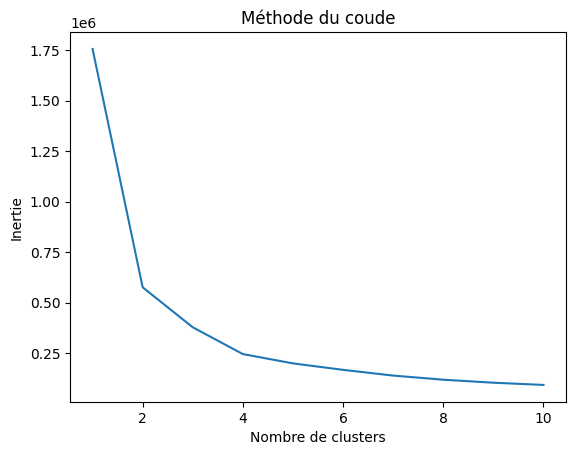

In [16]:
# Afficher le graphique de la méthode du coude
plt.plot(range(1, 11), inertia)
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

In [40]:
# Sélectionner le nombre optimal de clusters
k = 5

In [18]:
 df.columns.tolist()

['code',
 'url',
 'product_name',
 'quantity',
 'brands',
 'categories_en',
 'labels_en',
 'countries_en',
 'ingredients_text',
 'ingredients_analysis_tags',
 'additives_n',
 'nutriscore_score',
 'nutriscore_grade',
 'nova_group',
 'pnns_groups_1',
 'pnns_groups_2',
 'food_groups_en',
 'states_en',
 'ecoscore_grade',
 'nutrient_levels_tags',
 'unique_scans_n',
 'popularity_tags',
 'completeness',
 'main_category_en',
 'image_small_url',
 'image_ingredients_small_url',
 'image_nutrition_small_url',
 'energy-kcal_100g',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'fruits-vegetables-nuts-estimate-from-ingredients_100g',
 'nutrition-score-fr_100g',
 'fruits-vegetables-rate_100g']

## K-means

In [19]:
X2 = df.loc[:,[
 'brands',
 'categories_en',
 'countries_en',
 'additives_n',
 'nutriscore_grade',
 'nova_group',
 'pnns_groups_1',
 'pnns_groups_2',
 'food_groups_en',
 'main_category_en',
 'energy-kcal_100g',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'fruits-vegetables-nuts-estimate-from-ingredients_100g',
 'nutrition-score-fr_100g',
 'fruits-vegetables-rate_100g']]

In [20]:
X3 = df.loc[:,[
 'categories_en',
 'nutriscore_grade',
 'pnns_groups_1',
 'pnns_groups_2',
 'food_groups_en',
 'main_category_en',
 'energy-kcal_100g',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'fruits-vegetables-nuts-estimate-from-ingredients_100g',
 'nutrition-score-fr_100g',
 'fruits-vegetables-rate_100g']]

In [21]:
X4 = df.loc[:,[
 'energy-kcal_100g',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'fruits-vegetables-nuts-estimate-from-ingredients_100g',
 'nutrition-score-fr_100g',
 'fruits-vegetables-rate_100g']]

In [41]:
# Appliquer K-means avec le nombre optimal de clusters (avec PCA)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pca_df)

# Appliquer K-means avec le nombre optimal de clusters (sans PCA)
kmeans2 = KMeans(n_clusters=k, random_state=42)
kmeans2.fit(X2)

kmeans3 = KMeans(n_clusters=k, random_state=42)
kmeans3.fit(X3)

kmeans4 = KMeans(n_clusters=k, random_state=42)
kmeans4.fit(X4)

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

KMeans(n_clusters=5, random_state=42)

In [53]:
X5 = df.loc[:,['energy-kcal_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'proteins_100g',              
       'sodium_100g']] 

kmeans5 = KMeans(n_clusters=k, random_state=42)
kmeans5.fit(X5)

df['cluster_K_X5'] = kmeans5.labels_

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


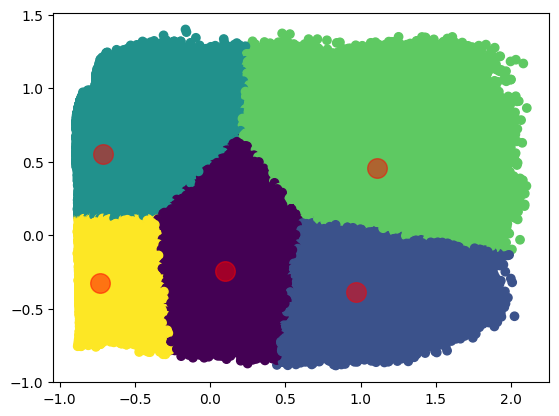

In [42]:
# Afficher les centres de cluster PCA
centers = kmeans.cluster_centers_
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=kmeans.labels_, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.show()


In [43]:
df['cluster_K_pca'] = kmeans.labels_
df['cluster_K_X2'] = kmeans2.labels_
df['cluster_K_X3'] = kmeans3.labels_
df['cluster_K_X4'] = kmeans4.labels_

In [54]:
df

code           url                  product_name   
0        0000000000000207025004  0.000000e+00                         andrè  \
1                 0000000000017  5.453714e-07              vitória crackers   
2            000000000004128579  1.090743e-06             burger meat pollo   
3            000000000004622327  1.636114e-06  hamburguesas de ternera 100%   
4               000000000006021  2.181485e-06      blueberry cobbler coffee   
...                         ...           ...                           ...   
1833609           3292590606497  4.150047e-01              instant feerique   
1833610                35033264  4.547246e-01                        doowap   
1833611                39240958  5.348102e-01                        doowap   
1833612                72355671  7.288495e-01                 almond butter   
1833613           7610095217400  7.407812e-01                 chili paprika   

         quantity    brands  categories_en  labels_en  countries_en   
0        0.986405  0.914596       0.985511   0.915291      0.795685  \
1        0.986405  0.914596       0.985511   0.915291      0.623343   
2        0.986405  0.914596       0.985511   0.915291      0.978945   
3        0.986405  0.914596       0.985511   0.915291      0.978945   
4        0.986405  0.914596       0.985511   0.915291      0.994801   
...           ...       ...            ...        ...           ...   
1833609  0.986405  0.887736       0.255604   0.102271      0.623343   
1833610  0.986405  0.383123       0.962093   0.431365      0.623343   
1833611  0.986405  0.383123       0.962093   0.915291      0.623343   
1833612  0.986405  0.383123       0.784973   0.915291      0.623343   
1833613  0.434427  0.972153       0.872549   0.915291      0.985183   

         ingredients_text  ingredients_analysis_tags  ...  salt_100g   
0                0.876550                   1.000000  ...   0.006000  \
1                0.876550                   1.000000  ...   0.014000   
2                0.876550                   1.000000  ...   0.006000   
3                0.876550                   1.000000  ...   0.021000   
4                0.876550                   1.000000  ...   0.000000   
...                   ...                        ...  ...        ...   
1833609          0.211606                   0.069767  ...   0.002000   
1833610          0.876550                   1.000000  ...   0.008800   
1833611          0.876550                   1.000000  ...   0.007300   
1833612          0.876550                   1.000000  ...   0.002016   
1833613          0.876550                   1.000000  ...   0.025000   

         sodium_100g  fruits-vegetables-nuts-estimate-from-ingredients_100g   
0           0.006000                                                0.0      \
1           0.014000                                                0.0       
2           0.006000                                                0.0       
3           0.021000                                                0.0       
4           0.000000                                                0.0       
...              ...                                                ...       
1833609     0.002000                                                0.5       
1833610     0.008800                                                0.0       
1833611     0.007300                                                0.0       
1833612     0.002016                                                0.0       
1833613     0.025000                                                0.0       

         nutrition-score-fr_100g  fruits-vegetables-rate_100g  cluster_K_pca   
0                       0.454545                          1.0              2  \
1                       0.454545                          1.0              2   
2                       0.454545                          1.0              2   
3                       0.454545                          1.0              2   
4          

### Nuage de mots

In [27]:
import nltk
import collections as co
from io import StringIO
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

In [35]:
# Définition des stop words
stop_words = set(stopwords.words('english'))
stop_words_fr = set(stopwords.words('french'))
stop_words_spanish = set(stopwords.words('spanish'))
stop_words_italian = set(stopwords.words('italian'))

stop_words |= stop_words_fr 
stop_words |= stop_words_spanish
stop_words |= stop_words_italian

stop_words.add('free')
stop_words.add('style')
stop_words.add('mini')
stop_words.add('bio')
stop_words.add('s')
stop_words.add('n')
stop_words.add('mit')

Cluster PCA

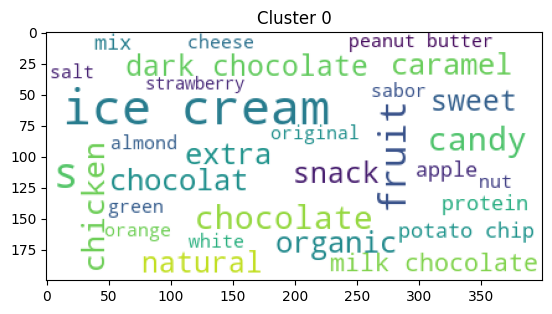

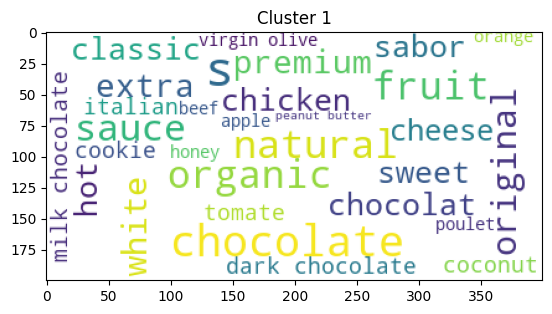

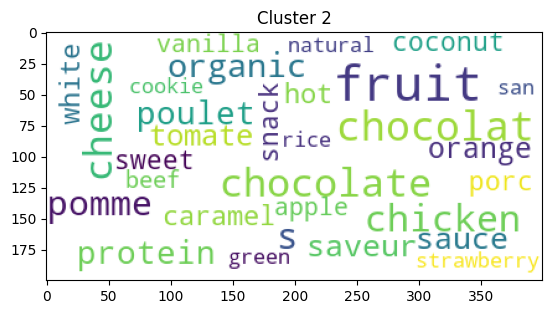

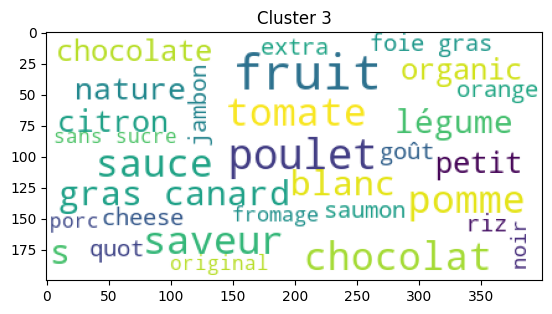

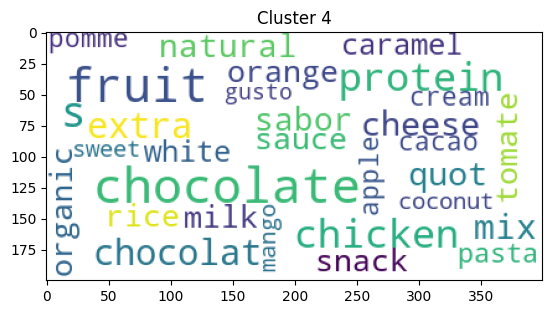

In [48]:
clusterPCA_0 = df['product_name'].where(df['cluster_K_pca'] == 0)
clusterPCA_1 = df['product_name'].where(df['cluster_K_pca'] == 1)
clusterPCA_2 = df['product_name'].where(df['cluster_K_pca'] == 2)
clusterPCA_3 = df['product_name'].where(df['cluster_K_pca'] == 3)
clusterPCA_4 = df['product_name'].where(df['cluster_K_pca'] == 4)


# Dropping rows where there is no product name
cluster0.dropna(inplace=True)
cluster1.dropna(inplace=True)
cluster2.dropna(inplace=True)

s_arr = []

def sio_factory():
    return StringIO()

for cluster in [clusterPCA_0, clusterPCA_1, clusterPCA_2, clusterPCA_3, clusterPCA_4]:
    si = sio_factory()
    cluster.apply(lambda x: si.write(str(x)))
    s_arr.append(si.getvalue())
    si.close()
    
cleaned = []
for s in s_arr:
    tokenized = word_tokenize(s)
    filtered_tokenized = list(filter(lambda x: x.lower() not in stop_words, tokenized))
    cleaned.append(filtered_tokenized)
    
final = []
for i in cleaned:
    final.append(' '.join(i))

for i, s in enumerate(final):
    text = s
    wordcloud = WordCloud(background_color="white",max_words=30,max_font_size=40, relative_scaling=.5).generate(text)
    plt.title('Cluster ' + str(i))
    plt.imshow(wordcloud)
    plt.show()

Cluster features X2

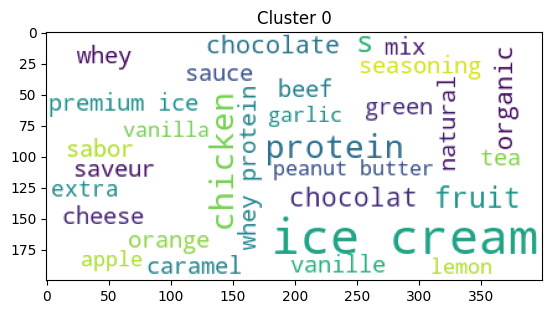

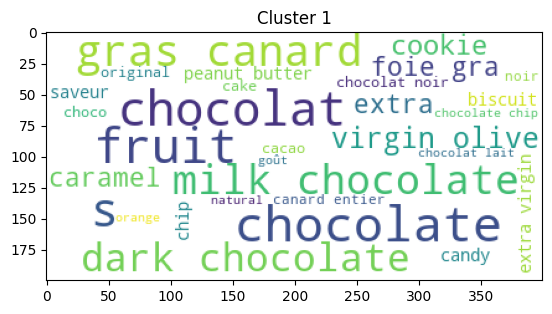

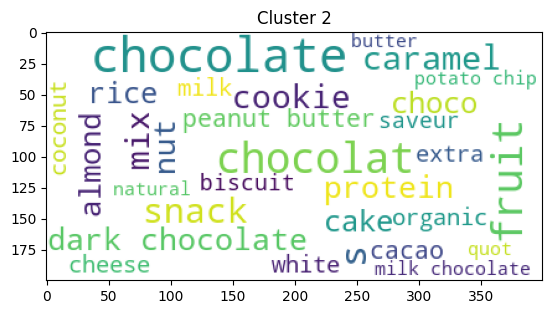

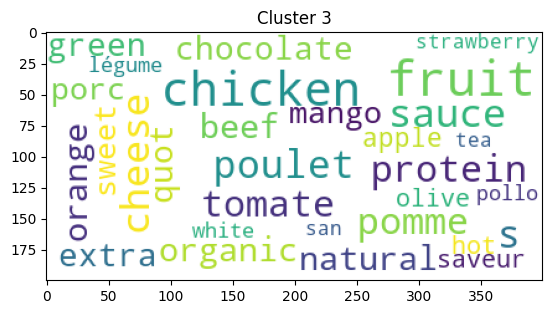

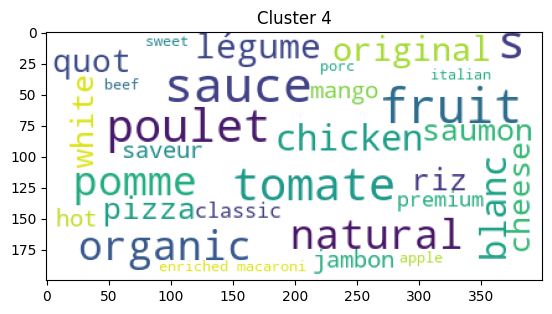

In [49]:
cluster2_0 = df['product_name'].where(df['cluster_K_X2'] == 0)
cluster2_1 = df['product_name'].where(df['cluster_K_X2'] == 1)
cluster2_2 = df['product_name'].where(df['cluster_K_X2'] == 2)
cluster2_3 = df['product_name'].where(df['cluster_K_X2'] == 3)
cluster2_4 = df['product_name'].where(df['cluster_K_X2'] == 4)


# Dropping rows where there is no product name
cluster0.dropna(inplace=True)
cluster1.dropna(inplace=True)
cluster2.dropna(inplace=True)

s_arr = []

def sio_factory():
    return StringIO()

for cluster in [cluster2_0, cluster2_1, cluster2_2, cluster2_3, cluster2_4]:
    si = sio_factory()
    cluster.apply(lambda x: si.write(str(x)))
    s_arr.append(si.getvalue())
    si.close()
    
cleaned = []
for s in s_arr:
    tokenized = word_tokenize(s)
    filtered_tokenized = list(filter(lambda x: x.lower() not in stop_words, tokenized))
    cleaned.append(filtered_tokenized)
    
final = []
for i in cleaned:
    final.append(' '.join(i))

for i, s in enumerate(final):
    text = s
    wordcloud = WordCloud(background_color="white",max_words=30,max_font_size=40, relative_scaling=.5).generate(text)
    plt.title('Cluster ' + str(i))
    plt.imshow(wordcloud)
    plt.show()

Cluster features X3

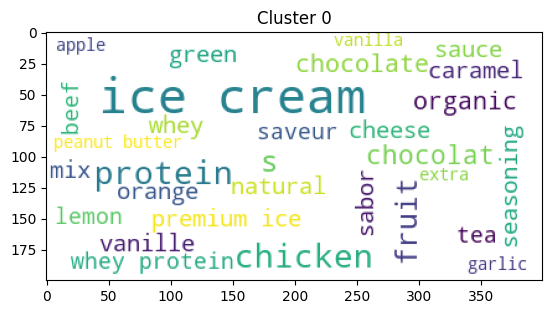

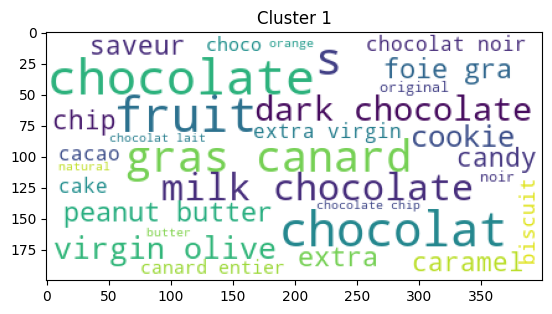

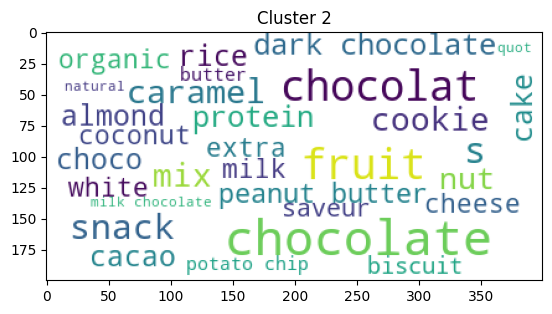

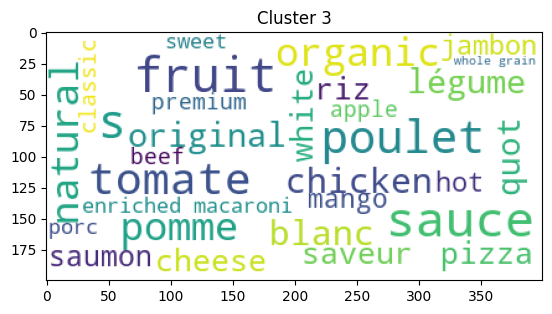

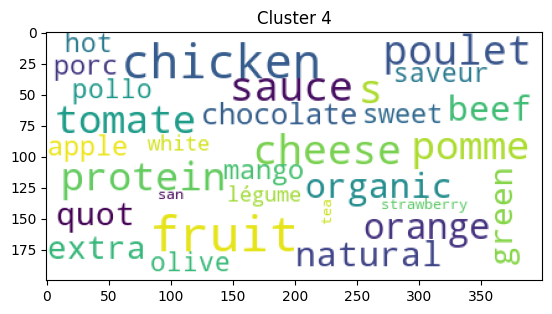

In [50]:
cluster3_0 = df['product_name'].where(df['cluster_K_X3'] == 0)
cluster3_1 = df['product_name'].where(df['cluster_K_X3'] == 1)
cluster3_2 = df['product_name'].where(df['cluster_K_X3'] == 2)
cluster3_3 = df['product_name'].where(df['cluster_K_X3'] == 3)
cluster3_4 = df['product_name'].where(df['cluster_K_X3'] == 4)


# Dropping rows where there is no product name
cluster0.dropna(inplace=True)
cluster1.dropna(inplace=True)
cluster2.dropna(inplace=True)

s_arr = []

def sio_factory():
    return StringIO()

for cluster in [cluster3_0, cluster3_1, cluster3_2, cluster3_3, cluster3_4]:
    si = sio_factory()
    cluster.apply(lambda x: si.write(str(x)))
    s_arr.append(si.getvalue())
    si.close()
    
cleaned = []
for s in s_arr:
    tokenized = word_tokenize(s)
    filtered_tokenized = list(filter(lambda x: x.lower() not in stop_words, tokenized))
    cleaned.append(filtered_tokenized)
    
final = []
for i in cleaned:
    final.append(' '.join(i))

for i, s in enumerate(final):
    text = s
    wordcloud = WordCloud(background_color="white",max_words=30,max_font_size=40, relative_scaling=.5).generate(text)
    plt.title('Cluster ' + str(i))
    plt.imshow(wordcloud)
    plt.show()

Cluster où les features d'entrainement ne sont que les _100g

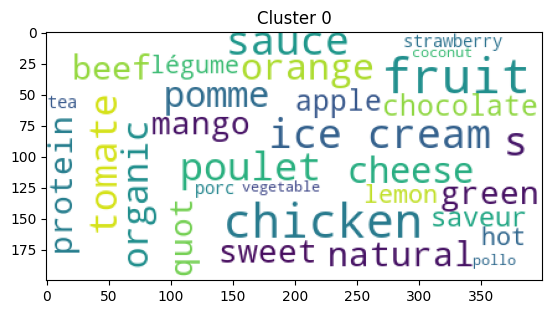

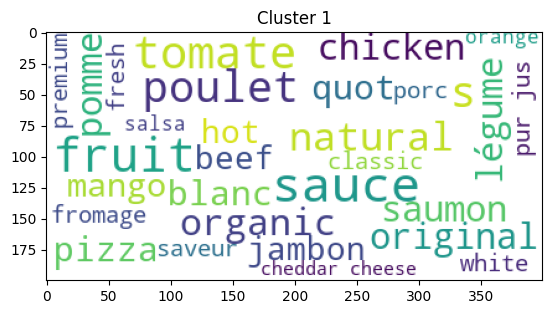

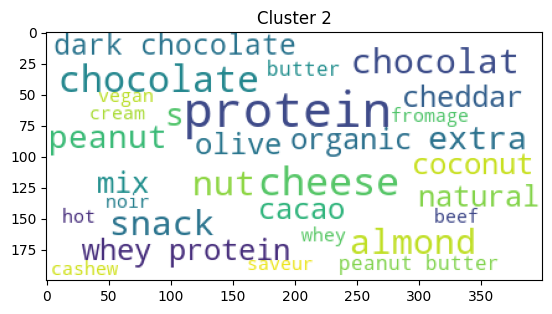

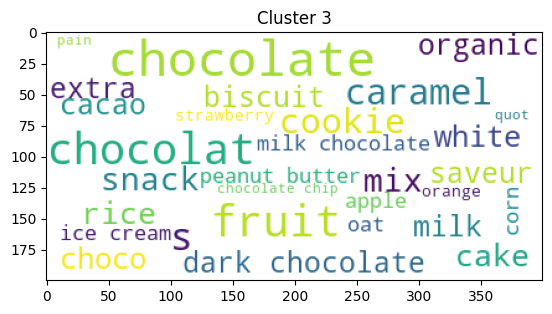

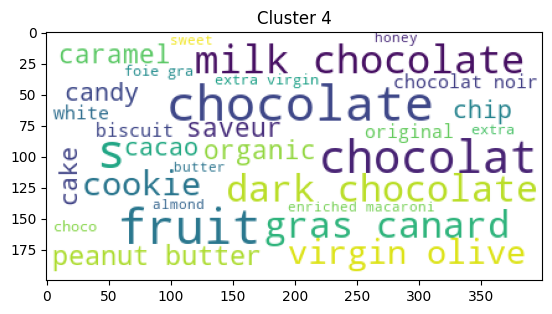

In [51]:
cluster0 = df['product_name'].where(df['cluster_K_X4'] == 0)
cluster1 = df['product_name'].where(df['cluster_K_X4'] == 1)
cluster2 = df['product_name'].where(df['cluster_K_X4'] == 2)
cluster3 = df['product_name'].where(df['cluster_K_X4'] == 3)
cluster4 = df['product_name'].where(df['cluster_K_X4'] == 4)


# Dropping rows where there is no product name
cluster0.dropna(inplace=True)
cluster1.dropna(inplace=True)
cluster2.dropna(inplace=True)

s_arr = []

def sio_factory():
    return StringIO()

for cluster in [cluster0, cluster1, cluster2, cluster3, cluster4]:
    si = sio_factory()
    cluster.apply(lambda x: si.write(str(x)))
    s_arr.append(si.getvalue())
    si.close()
    
cleaned = []
for s in s_arr:
    tokenized = word_tokenize(s)
    filtered_tokenized = list(filter(lambda x: x.lower() not in stop_words, tokenized))
    cleaned.append(filtered_tokenized)
    
final = []
for i in cleaned:
    final.append(' '.join(i))

for i, s in enumerate(final):
    text = s
    wordcloud = WordCloud(background_color="white",max_words=30,max_font_size=40, relative_scaling=.5).generate(text)
    plt.title('Cluster ' + str(i))
    plt.imshow(wordcloud)
    plt.show()

Cluster features X5

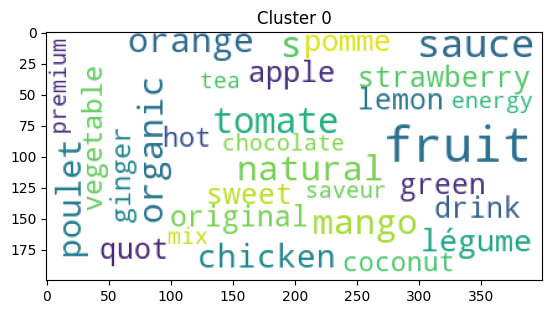

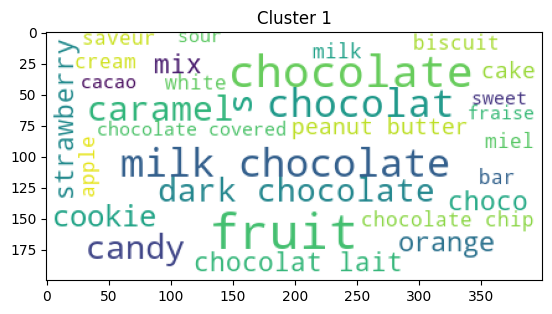

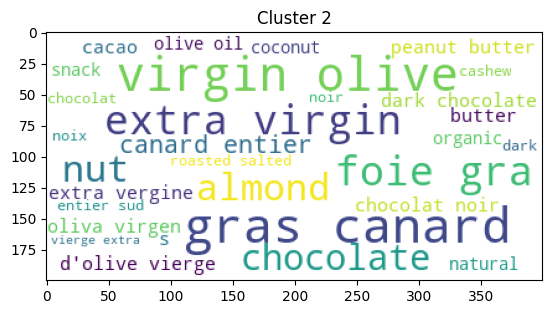

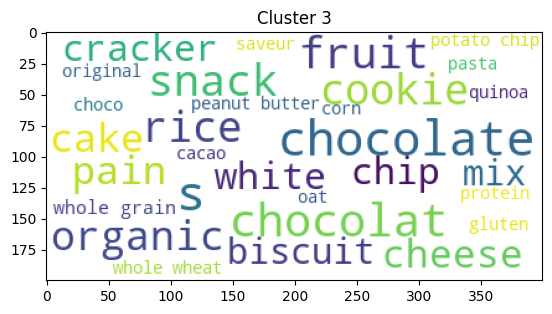

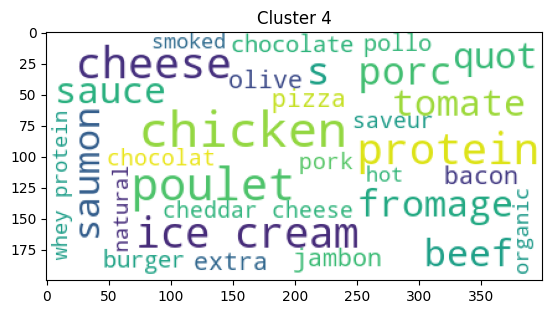

In [55]:
cluster0 = df['product_name'].where(df['cluster_K_X5'] == 0)
cluster1 = df['product_name'].where(df['cluster_K_X5'] == 1)
cluster2 = df['product_name'].where(df['cluster_K_X5'] == 2)
cluster3 = df['product_name'].where(df['cluster_K_X5'] == 3)
cluster4 = df['product_name'].where(df['cluster_K_X5'] == 4)


# Dropping rows where there is no product name
cluster0.dropna(inplace=True)
cluster1.dropna(inplace=True)
cluster2.dropna(inplace=True)

s_arr = []

def sio_factory():
    return StringIO()

for cluster in [cluster0, cluster1, cluster2, cluster3, cluster4]:
    si = sio_factory()
    cluster.apply(lambda x: si.write(str(x)))
    s_arr.append(si.getvalue())
    si.close()
    
cleaned = []
for s in s_arr:
    tokenized = word_tokenize(s)
    filtered_tokenized = list(filter(lambda x: x.lower() not in stop_words, tokenized))
    cleaned.append(filtered_tokenized)
    
final = []
for i in cleaned:
    final.append(' '.join(i))

for i, s in enumerate(final):
    text = s
    wordcloud = WordCloud(background_color="white",max_words=30,max_font_size=40, relative_scaling=.5).generate(text)
    plt.title('Cluster ' + str(i))
    plt.imshow(wordcloud)
    plt.show()

Cluster 0 : surtout fruit et légume

Cluster 1 : produit plutot sucré / chocolat

Cluster 2 : produit plutot gras (huile, canard)

Cluster 3 : un peu aléatoire mais on retrouve plutot les glucides / graines

Cluster 4 : produit protéiné (viande, fromage)

Test sur df plus petit

In [76]:
df_small = df.loc[df["pnns_groups_2"] != 0.923077]

In [74]:
df_small = df[np.isclose(df['pnns_groups_2'],0.923077, 0.0000000001)]

In [77]:
df_small

code           url                  product_name   
0        0000000000000207025004  0.000000e+00                         andrè  \
1                 0000000000017  5.453714e-07              vitória crackers   
2            000000000004128579  1.090743e-06             burger meat pollo   
3            000000000004622327  1.636114e-06  hamburguesas de ternera 100%   
4               000000000006021  2.181485e-06      blueberry cobbler coffee   
...                         ...           ...                           ...   
1833609           3292590606497  4.150047e-01              instant feerique   
1833610                35033264  4.547246e-01                        doowap   
1833611                39240958  5.348102e-01                        doowap   
1833612                72355671  7.288495e-01                 almond butter   
1833613           7610095217400  7.407812e-01                 chili paprika   

         quantity    brands  categories_en  labels_en  countries_en   
0        0.986405  0.914596       0.985511   0.915291      0.795685  \
1        0.986405  0.914596       0.985511   0.915291      0.623343   
2        0.986405  0.914596       0.985511   0.915291      0.978945   
3        0.986405  0.914596       0.985511   0.915291      0.978945   
4        0.986405  0.914596       0.985511   0.915291      0.994801   
...           ...       ...            ...        ...           ...   
1833609  0.986405  0.887736       0.255604   0.102271      0.623343   
1833610  0.986405  0.383123       0.962093   0.431365      0.623343   
1833611  0.986405  0.383123       0.962093   0.915291      0.623343   
1833612  0.986405  0.383123       0.784973   0.915291      0.623343   
1833613  0.434427  0.972153       0.872549   0.915291      0.985183   

         ingredients_text  ingredients_analysis_tags  ...  salt_100g   
0                0.876550                   1.000000  ...   0.006000  \
1                0.876550                   1.000000  ...   0.014000   
2                0.876550                   1.000000  ...   0.006000   
3                0.876550                   1.000000  ...   0.021000   
4                0.876550                   1.000000  ...   0.000000   
...                   ...                        ...  ...        ...   
1833609          0.211606                   0.069767  ...   0.002000   
1833610          0.876550                   1.000000  ...   0.008800   
1833611          0.876550                   1.000000  ...   0.007300   
1833612          0.876550                   1.000000  ...   0.002016   
1833613          0.876550                   1.000000  ...   0.025000   

         sodium_100g  fruits-vegetables-nuts-estimate-from-ingredients_100g   
0           0.006000                                                0.0      \
1           0.014000                                                0.0       
2           0.006000                                                0.0       
3           0.021000                                                0.0       
4           0.000000                                                0.0       
...              ...                                                ...       
1833609     0.002000                                                0.5       
1833610     0.008800                                                0.0       
1833611     0.007300                                                0.0       
1833612     0.002016                                                0.0       
1833613     0.025000                                                0.0       

         nutrition-score-fr_100g  fruits-vegetables-rate_100g  cluster_K_pca   
0                       0.454545                          1.0              2  \
1                       0.454545                          1.0              2   
2                       0.454545                          1.0              2   
3                       0.454545                          1.0              2   
4          

In [69]:
X5_small = df_small.loc[:,['energy-kcal_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'proteins_100g',              
       'sodium_100g']] 

kmeans5_small = KMeans(n_clusters=k, random_state=42)
kmeans5_small.fit(X5_small)

df_small['cluster_K_X5_small'] = kmeans5_small.labels_

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


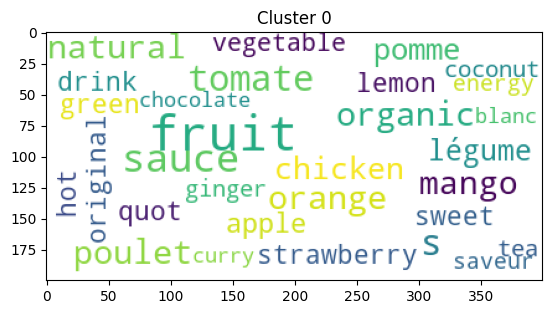

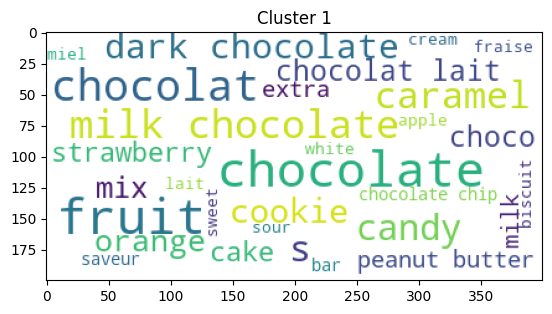

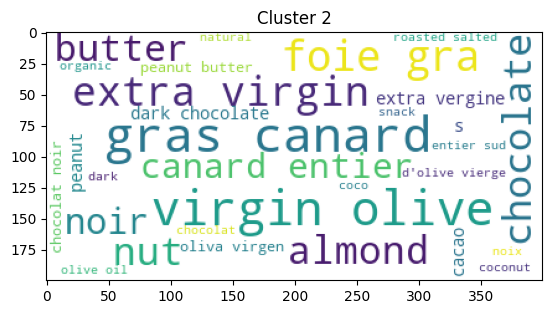

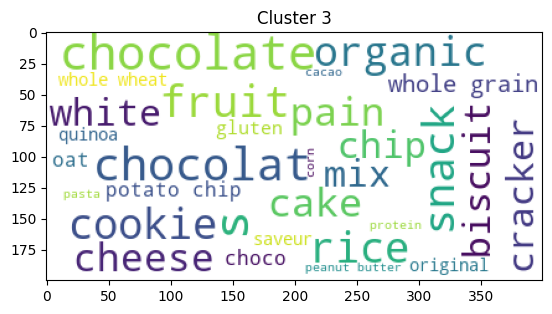

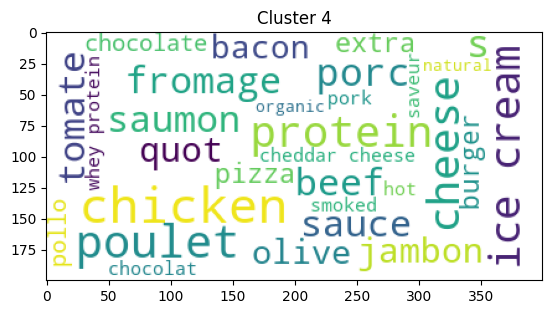

In [70]:
cluster0_X5_xmall = df_small['product_name'].where(df_small['cluster_K_X5_small'] == 0)
cluster1_X5_xmall = df_small['product_name'].where(df_small['cluster_K_X5_small'] == 1)
cluster2_X5_xmall = df_small['product_name'].where(df_small['cluster_K_X5_small'] == 2)
cluster3_X5_xmall = df_small['product_name'].where(df_small['cluster_K_X5_small'] == 3)
cluster4_X5_xmall = df_small['product_name'].where(df_small['cluster_K_X5_small'] == 4)


# Dropping rows where there is no product name
cluster0.dropna(inplace=True)
cluster1.dropna(inplace=True)
cluster2.dropna(inplace=True)

s_arr = []

def sio_factory():
    return StringIO()

for cluster in [cluster0_X5_xmall, cluster1_X5_xmall, cluster2_X5_xmall, cluster3_X5_xmall, cluster4_X5_xmall]:
    si = sio_factory()
    cluster.apply(lambda x: si.write(str(x)))
    s_arr.append(si.getvalue())
    si.close()
    
cleaned = []
for s in s_arr:
    tokenized = word_tokenize(s)
    filtered_tokenized = list(filter(lambda x: x.lower() not in stop_words, tokenized))
    cleaned.append(filtered_tokenized)
    
final = []
for i in cleaned:
    final.append(' '.join(i))

for i, s in enumerate(final):
    text = s
    wordcloud = WordCloud(background_color="white",max_words=30,max_font_size=40, relative_scaling=.5).generate(text)
    plt.title('Cluster ' + str(i))
    plt.imshow(wordcloud)
    plt.show()

## AgglomerativeClustering

In [59]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo.fit(X5)

MemoryError: Unable to allocate 12.2 TiB for an array with shape (1681069233691,) and data type float64

## DBSCAN

In [60]:
# Appliquer DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X5)

MemoryError: 

In [ ]:
# Afficher les clusters
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=dbscan.labels_, cmap='viridis')
plt.show()

## Hierarchical

In [61]:
import pandas as pd
import numpy as np
import logging
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, FeatureAgglomeration
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    """
    This function creates a linkage matrix from the model and uses it to plot a
    dendrogram of the clustering. The linkage matrix is created by counting the
    number of samples under each node of the dendrogram, and the scipy dendrogram
    function is used to actually plot the dendrogram. Additional keyword arguments
    can be passed to the scipy dendrogram function through **kwargs.
    Keyword arguments:
    ------------------
        model: AgglomerativeClustering or FeatureAgglomeration object
            The fitted hierarchical clustering model to visualize.
        **kwargs: optional keyword arguments
            Additional arguments to pass to the scipy dendrogram function.
    Returns:
    --------
        None
    """
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



def hie_clustering(df, modeltype=AgglomerativeClustering, n_clusters=2, linkage='ward', metric='euclidean', plotdendrogram=False):
    """
    Hierachical clustering method from Scikit-Learn.
    Keyword arguments:
    ------------------
        df: pandas.DataFrame
            The input DataFrame.
        modeltype: type, optional (default AgglomerativeClustering)
            Which clustering algorithm to use. Possible values are:
            - AgglomerativeClustering : performs a hierarchical clustering using a bottom up approach:
            each observation starts in its own cluster, and clusters are successively merged together.
            - FeatureAgglomeration : uses agglomerative clustering to group together features that look
            very similar, thus decreasing the number of features.
        n_clusters: int, optional (default 2)
            Number of cluster to find.
        linkage: str, optional (default 'ward')
            Which linkage criterion to use. The linkage criterion determines which distance to use
            between sets of features. The algorithm will merge the pairs of cluster that minimize
            this criterion. Possible values are:
            - 'ward' minimizes the variance of the clusters being merged
            - 'average' uses the average of the distances of each observation of the two sets
            - 'complete' linkage uses the maximum distances between all observations of the two sets
            - 'single' uses the minimum of the distances between all observations of the two sets
        metric: str, optional (default 'euclidean')
            Metric used to compute the linkage.
            Can be 'euclidean', 'l1', 'l2', 'manhattan', 'cosine', or 'precomputed'.
            If linkage is 'ward', only 'euclidean' is accepted.
        plotdendrogram: bool, optional (default False)
            Will plot the dendogram.
    Returns:
    --------
        sklearn cluster object
    Author:
    -------
        Joëlle Sabourdy
    """
    if linkage == 'ward' and metric != 'euclidean':
        metric='euclidean'
        logging.warning("If linkage is 'ward', only 'euclidean' is accepted. Automatically switch to 'euclidean'.")
        
    if plotdendrogram==True and n_clusters != None:
        n_clusters=None
        dt=0
        logging.warning("Exactly one of n_clusters and distance_threshold has to be set, and the other needs to be None. Automatically switch to None.")
    else:
        dt=None
  
    model = modeltype(n_clusters=n_clusters,linkage=linkage,metric=metric,distance_threshold=dt).fit(df)

    if plotdendrogram:
        plt.title("Hierarchical Clustering Dendrogram")
        # plot the top three levels of the dendrogram
        plot_dendrogram(model, truncate_mode="level", p=3)
        plt.xlabel("Number of points in node (or index of point if no parenthesis).")
        plt.show()

    return model, model.labels_



In [65]:
hieX5 = hie_clustering(df=X5, modeltype=AgglomerativeClustering, n_clusters=5, linkage='ward', metric='l1', plotdendrogram=False)

MemoryError: Unable to allocate 12.2 TiB for an array with shape (1681069233691,) and data type float64